In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import warnings
warnings.filterwarnings('ignore')
sns.set()
plt.style.use('ggplot')
%matplotlib inline

**Load Data set**

In [ ]:
df=pd.read_csv("https://github.com/Chando0185/Multiverse_of_100-_data_science_project_series/raw/refs/heads/main/Liver%20Disease%20Prediction%20Using%20ML/liver.csv")
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [ ]:
df.shape

(583, 11)

In [ ]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


**handling null values**

In [ ]:
df.isnull().sum()

,0
Age,0
Gender,0
Total_Bilirubin,0
Direct_Bilirubin,0
Alkaline_Phosphotase,0
Alamine_Aminotransferase,0
Aspartate_Aminotransferase,0
Total_Protiens,0
Albumin,0
Albumin_and_Globulin_Ratio,4


In [ ]:
df=df.dropna(how='any')

**Check duplicate**

In [ ]:
df.duplicated().sum()

np.int64(13)

In [ ]:
df=df.drop_duplicates()

**Exploratory Data Analysis**

In [ ]:
df.select_dtypes(include='object').columns.tolist()

['Gender']

**Distribution of all Numerical Features**

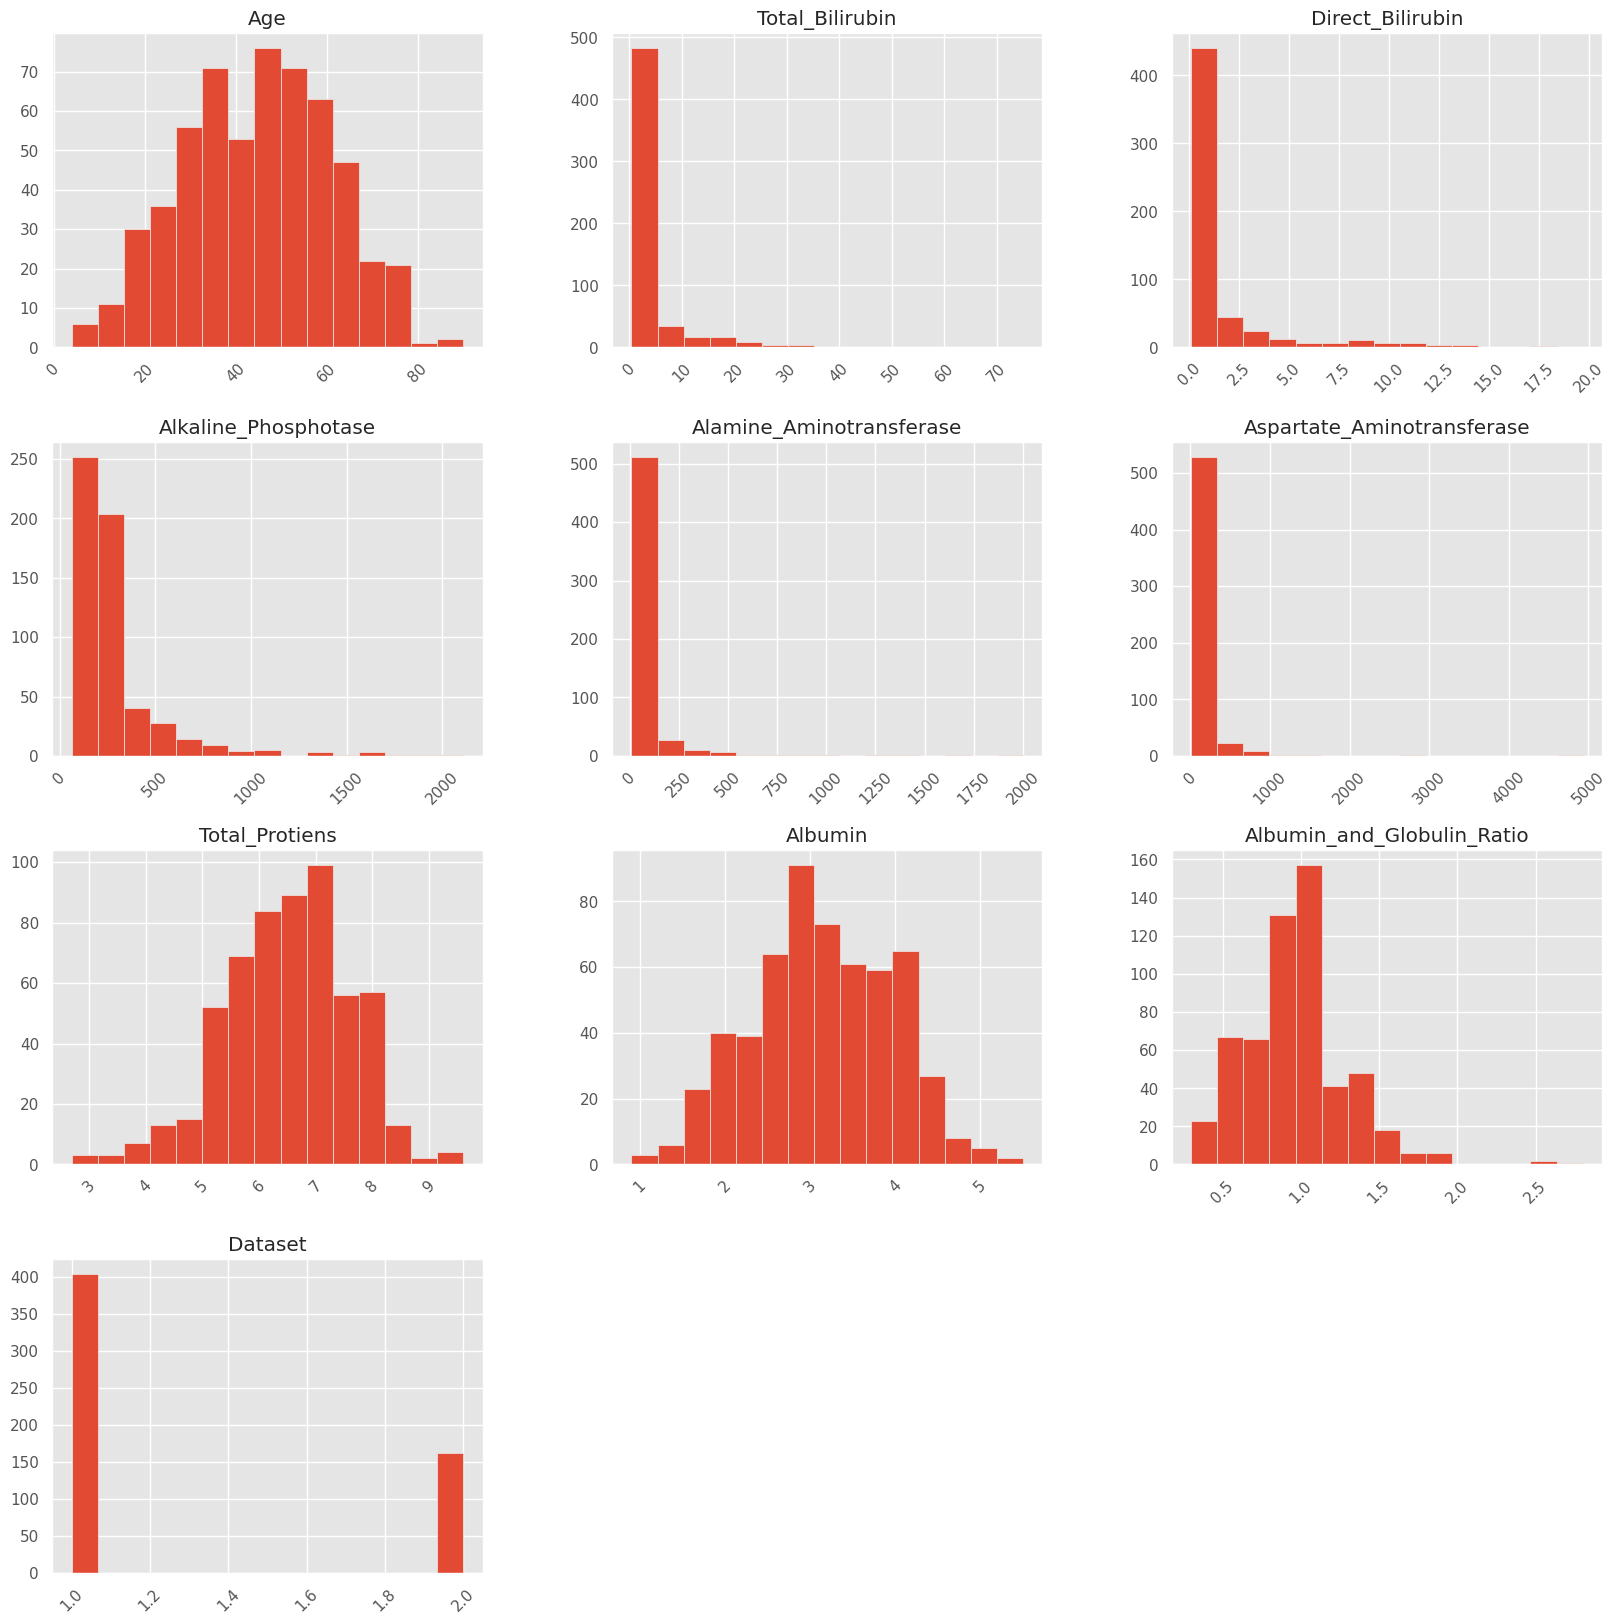

In [ ]:
df.hist(figsize=(20,20) ,xrot=45,bins=15)
plt.show()



---
the column name dataset is the target column



In [ ]:
df['target']=df['Dataset'].map(lambda x: 0 if x==2 else 1 )

In [ ]:
df.drop(columns='Dataset',axis=1,inplace=True)

In [ ]:
df.shape

(566, 11)

**Outliers**

In [ ]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,target
count,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000
mean,44.886926,3.338869,1.505830,292.567138,80.143110,109.892226,6.494876,3.145583,0.948004,0.713781
std,16.274893,6.286728,2.841485,245.936559,182.044881,291.841897,1.087512,0.795745,0.319635,0.452393
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,33.000000,0.800000,0.200000,176.000000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,41.000000,6.600000,3.100000,0.950000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.750000,87.000000,7.200000,3.800000,1.100000,1.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,1.000000


In [ ]:
df['target'].value_counts()

,count
target,
1,404
0,162


In [ ]:
df['Gender'].value_counts()

,count
Gender,
Male,428
Female,138


**Bar plot for Gender**

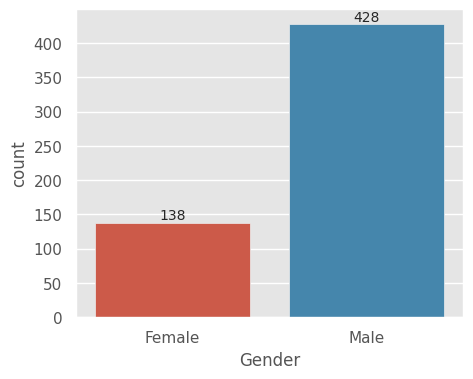

In [ ]:
plt.figure(figsize=(5,4))
ax=sns.countplot(data=df, x='Gender' ,hue='Gender')
for i in ax.containers:
  ax.bar_label(i)
plt.show()

**Relation between Gender,Age and Targel column**

<Figure size 500x400 with 0 Axes>

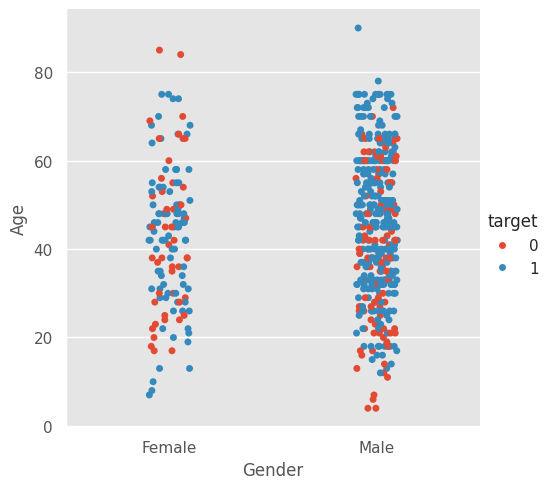

In [ ]:
plt.figure(figsize=(5,4))
sns.catplot(x="Gender", y="Age", hue="target", data=df, kind="strip")
plt.show()

In [ ]:
df['Gender']=df['Gender'].map({"Male":0,"Female":1})

**Correlation**

In [ ]:
df.corr()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,target
Age,1.000000,-0.057542,0.010704,0.006268,0.080085,-0.084319,-0.017352,-0.195893,-0.269448,-0.215967,0.133821
Gender,-0.057542,1.000000,-0.089068,-0.100448,0.024879,-0.083336,-0.080593,0.092049,0.093208,0.005611,-0.077396
Total_Bilirubin,0.010704,-0.089068,1.000000,0.873975,0.205286,0.216776,0.238167,-0.008423,-0.223979,-0.207740,0.224467
Direct_Bilirubin,0.006268,-0.100448,0.873975,1.000000,0.233653,0.236731,0.257965,-0.000735,-0.230650,-0.201519,0.250926
Alkaline_Phosphotase,0.080085,0.024879,0.205286,0.233653,1.000000,0.125917,0.166609,-0.028623,-0.166287,-0.236251,0.186057
Alamine_Aminotransferase,-0.084319,-0.083336,0.216776,0.236731,0.125917,1.000000,0.791754,-0.035104,-0.026890,-0.006525,0.161617
Aspartate_Aminotransferase,-0.017352,-0.080593,0.238167,0.257965,0.166609,0.791754,1.000000,-0.022114,-0.084821,-0.072899,0.151009
Total_Protiens,-0.195893,0.092049,-0.008423,-0.000735,-0.028623,-0.035104,-0.022114,1.000000,0.783800,0.234576,-0.036443
Albumin,-0.269448,0.093208,-0.223979,-0.230650,-0.166287,-0.026890,-0.084821,0.783800,1.000000,0.687438,-0.165273
Albumin_and_Globulin_Ratio,-0.215967,0.005611,-0.207740,-0.201519,-0.236251,-0.006525,-0.072899,0.234576,0.687438,1.000000,-0.171402


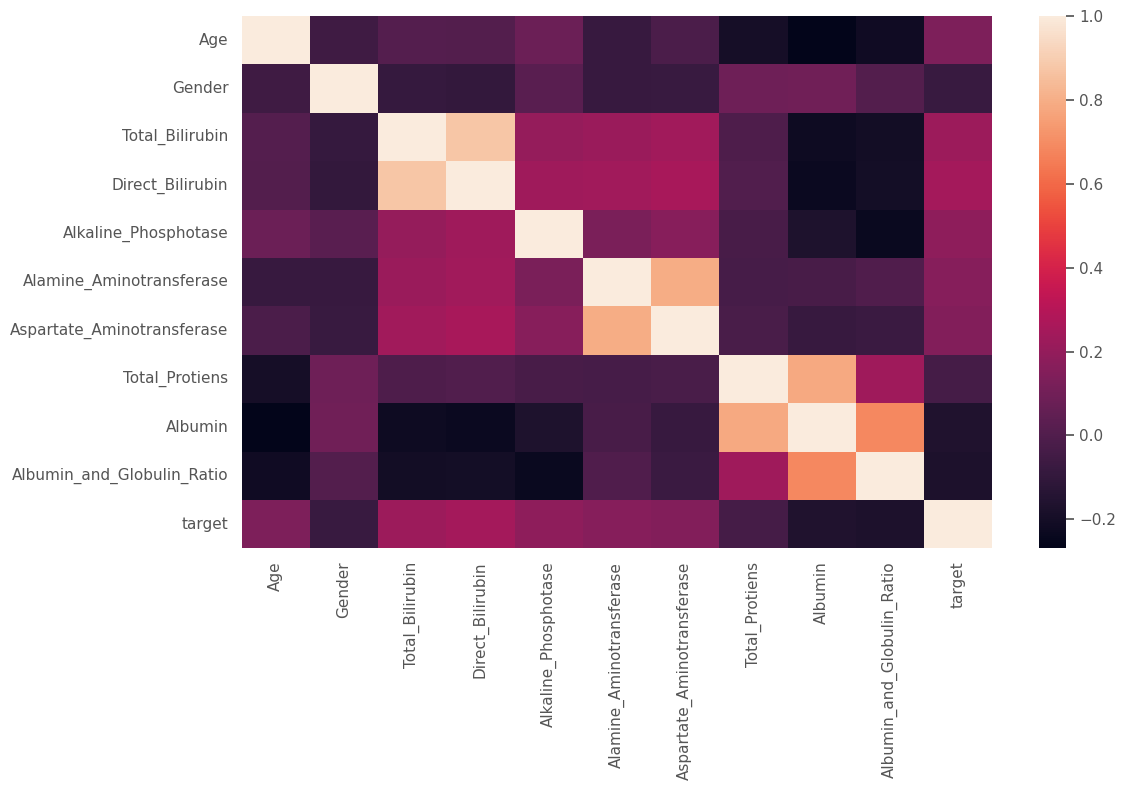

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr())
plt.tight_layout()
plt.show()


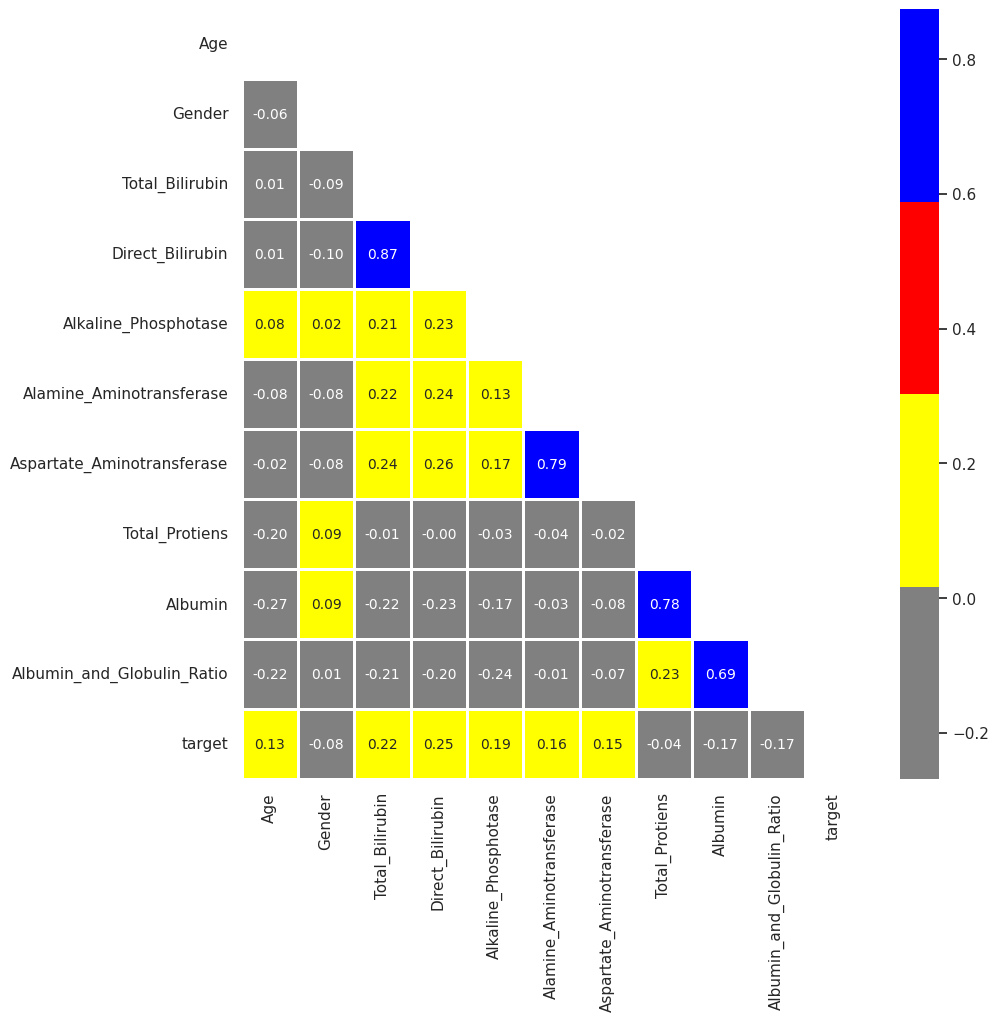

In [ ]:
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10,10))
with sns.axes_style("white"):
    ax = sns.heatmap(df.corr(), mask=mask, fmt = ".2f", annot=True, lw=1, cmap=ListedColormap(['grey','yellow','red','blue']))

**Removing Outliers**

In [ ]:
df.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,target
count,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000
mean,44.886926,0.243816,3.338869,1.505830,292.567138,80.143110,109.892226,6.494876,3.145583,0.948004,0.713781
std,16.274893,0.429763,6.286728,2.841485,245.936559,182.044881,291.841897,1.087512,0.795745,0.319635,0.452393
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,33.000000,0.000000,0.800000,0.200000,176.000000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,0.000000,1.000000,0.300000,208.000000,35.000000,41.000000,6.600000,3.100000,0.950000,1.000000
75%,58.000000,0.000000,2.600000,1.300000,298.000000,60.750000,87.000000,7.200000,3.800000,1.100000,1.000000
max,90.000000,1.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,1.000000


<Axes: ylabel='Aspartate_Aminotransferase'>

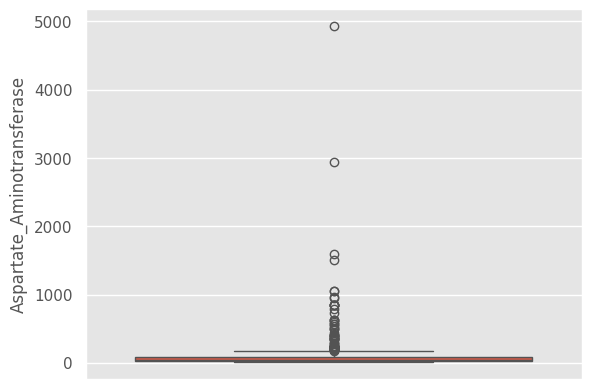

In [ ]:
# Aspartate_Aminotransferase in this column mean 109 and max is 4929
sns.boxplot(df['Aspartate_Aminotransferase'])



> Note : So Many Outliers



In [ ]:
df['Aspartate_Aminotransferase'].sort_values(ascending=False).head(7)

,Aspartate_Aminotransferase
135,4929
117,2946
118,1600
207,1500
199,1050
119,1050
47,960


In [ ]:
df = df[df.Aspartate_Aminotransferase<=2000]

In [ ]:
df.shape

(564, 11)

<Axes: ylabel='Alamine_Aminotransferase'>

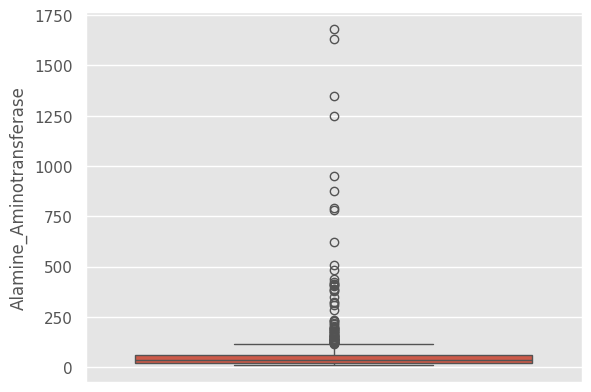

In [ ]:
sns.boxplot(df['Alamine_Aminotransferase'])

In [ ]:
df['Total_Bilirubin'].sort_values(ascending=False).head(10)

,Total_Bilirubin
166,75.0
559,42.8
505,32.6
531,30.8
504,30.5
259,30.5
547,27.7
199,27.2
519,26.3
575,25.0


In [ ]:
cols=['Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase']
outliers = {}

for col in cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier_mask = (df[col] < lower_bound) | (df[col] > upper_bound)
    outlier_rows = df[outlier_mask]


    outliers[col] = outlier_rows.shape[0]

print("\n=== Outlier Summary ===")
for col, count in outliers.items():
    print(f"{col}: {count} outliers")



=== Outlier Summary ===
Alkaline_Phosphotase: 68 outliers
Alamine_Aminotransferase: 70 outliers
Aspartate_Aminotransferase: 64 outliers


In this project, I worked with a small medical dataset of 564 samples. While exploring the data, I discovered a significant number of statistical outliers across multiple features, such as Alkaline_Phosphotase, Alamine_Aminotransferase, and Aspartate_Aminotransferase, with 60–70 outliers each.

**Now Trained on the full dataset (with outliers) and Predict the accuarcy**

In [ ]:
df_copy = df.copy()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [ ]:
X=df.drop('target', axis=1)
y=df['target']

**Train Test Split**

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

**Standardization**

In [ ]:
train_mean=X_train.mean()
train_std=X_train.std()

In [ ]:
X_train=(X_train-train_mean)/train_std

In [ ]:
X_test=(X_test-train_mean)/train_std

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_classification_models(X_train, X_test, y_train, y_test):
    models = {
        "Logistic Regression": LogisticRegression(max_iter=1000),
        "Decision Tree": DecisionTreeClassifier(),
        "Random Forest": RandomForestClassifier(),
        "SVM": SVC(),
        "Gradient Boosting": GradientBoostingClassifier()
    }

    results = []

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        results.append({
            'Model': name,
            'Accuracy': accuracy_score(y_test, y_pred),
            'Precision': precision_score(y_test, y_pred, average='weighted', zero_division=0),
            'Recall': recall_score(y_test, y_pred, average='weighted'),
            'F1 Score': f1_score(y_test, y_pred, average='weighted')
        })

    results_df = pd.DataFrame(results).sort_values(by='F1 Score', ascending=False)
    return results_df


In [ ]:
results_df = evaluate_classification_models(X_train, X_test, y_train, y_test)
print(results_df)

                 Model  Accuracy  Precision    Recall  F1 Score
4    Gradient Boosting  0.778761   0.767723  0.778761  0.769758
1        Decision Tree  0.725664   0.739621  0.725664  0.731235
2        Random Forest  0.743363   0.722805  0.743363  0.724890
0  Logistic Regression  0.725664   0.690095  0.725664  0.682147
3                  SVM  0.716814   0.513823  0.716814  0.598577


**Hyperparameter Tuning**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
import pandas as pd

def tune_and_evaluate_models(X_train, X_test, y_train, y_test):
    models = {
        "Logistic Regression": (LogisticRegression(max_iter=1000), {
            'C': [0.01, 0.1, 1, 10],
            'solver': ['liblinear', 'lbfgs']
        }),
        "Decision Tree": (DecisionTreeClassifier(), {
            'max_depth': [None, 5, 10, 20],
            'min_samples_split': [2, 5, 10]
        }),
        "Random Forest": (RandomForestClassifier(), {
            'n_estimators': [100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5]
        }),
        "SVM": (SVC(), {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf'],
            'gamma': ['scale', 'auto']
        }),
        "Gradient Boosting": (GradientBoostingClassifier(), {
            'n_estimators': [100, 200],
            'learning_rate': [0.01, 0.1],
            'max_depth': [3, 5]
        })
    }

    results = []

    for name, (model, param_grid) in models.items():
        print(f"Tuning {name}...")
        grid = GridSearchCV(model, param_grid, scoring='f1_weighted', cv=5, n_jobs=-1)
        grid.fit(X_train, y_train)

        best_model = grid.best_estimator_
        best_params = grid.best_params_
        best_cv_score = grid.best_score_
        y_pred = best_model.predict(X_test)
        test_accuracy = accuracy_score(y_test, y_pred)
        test_precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
        test_recall = recall_score(y_test, y_pred, average='weighted')
        test_f1 = f1_score(y_test, y_pred, average='weighted')

        results.append({
            'Model': name,
            'Best CV F1 Score': best_cv_score,
            'Test Accuracy': test_accuracy,
            'Test Precision': test_precision,
            'Test Recall': test_recall,
            'Test F1 Score': test_f1,
            'Best Parameters': best_params
        })

    results_df = pd.DataFrame(results).sort_values(by='Test F1 Score', ascending=False)
    return results_df


In [ ]:
results_df_for_tuning = tune_and_evaluate_models(X_train, X_test, y_train, y_test)
print(results_df_for_tuning)


Tuning Logistic Regression...
Tuning Decision Tree...
Tuning Random Forest...
Tuning SVM...
Tuning Gradient Boosting...
                 Model  Best CV F1 Score  Test Accuracy  Test Precision  \
4    Gradient Boosting          0.659372       0.796460        0.788914   
2        Random Forest          0.652589       0.761062        0.743155   
0  Logistic Regression          0.683981       0.743363        0.719124   
1        Decision Tree          0.618328       0.707965        0.705232   
3                  SVM          0.605175       0.707965        0.670875   

   Test Recall  Test F1 Score  \
4     0.796460       0.790883   
2     0.761062       0.739484   
0     0.743363       0.714956   
1     0.707965       0.706543   
3     0.707965       0.675640   

                                     Best Parameters  
4  {'learning_rate': 0.1, 'max_depth': 5, 'n_esti...  
2  {'max_depth': 20, 'min_samples_split': 5, 'n_e...  
0                   {'C': 10, 'solver': 'liblinear'}  
1         

In [ ]:
results_df_for_tuning

,Model,Best CV F1 Score,Test Accuracy,Test Precision,Test Recall,Test F1 Score,Best Parameters
4,Gradient Boosting,0.659372,0.796460,0.788914,0.796460,0.790883,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti..."
2,Random Forest,0.652589,0.761062,0.743155,0.761062,0.739484,"{'max_depth': 20, 'min_samples_split': 5, 'n_e..."
0,Logistic Regression,0.683981,0.743363,0.719124,0.743363,0.714956,"{'C': 10, 'solver': 'liblinear'}"
1,Decision Tree,0.618328,0.707965,0.705232,0.707965,0.706543,"{'max_depth': 5, 'min_samples_split': 5}"
3,SVM,0.605175,0.707965,0.670875,0.707965,0.675640,"{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}"


**Train Model without outlier**

In [ ]:
df_copy.shape

(564, 11)

In [ ]:
cols=['Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase']
outliers = {}

for col in cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier_mask = (df[col] > lower_bound) & (df[col] < upper_bound)
    df = df[outlier_mask]


In [ ]:
df.shape

(397, 11)

<Axes: ylabel='Alkaline_Phosphotase'>

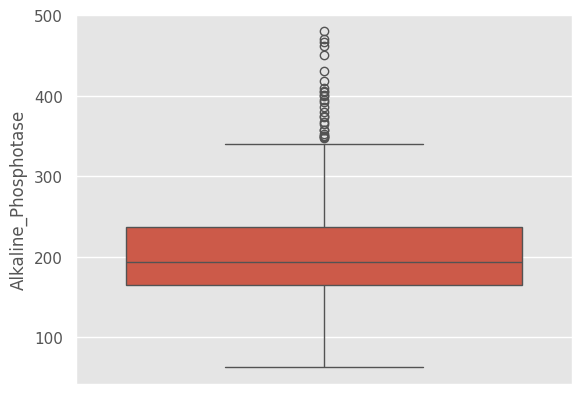

In [ ]:
sns.boxplot(df['Alkaline_Phosphotase'])

In [ ]:
df['Alkaline_Phosphotase'].sort_values(ascending=False).head(5)

,Alkaline_Phosphotase
250,480
65,470
535,466
156,462
418,450


In [ ]:
X=df.drop('target', axis=1)
y=df['target']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
train_mean=X_train.mean()
train_std=X_train.std()
X_train=(X_train-train_mean)/train_std
X_test=(X_test-train_mean)/train_std

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_classification_models(X_train, X_test, y_train, y_test):
    models = {
        "Logistic Regression": LogisticRegression(max_iter=1000),
        "Decision Tree": DecisionTreeClassifier(),
        "Random Forest": RandomForestClassifier(),
        "SVM": SVC(),
        "Gradient Boosting": GradientBoostingClassifier()
    }

    results = []

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        results.append({
            'Model': name,
            'Accuracy': accuracy_score(y_test, y_pred),
            'Precision': precision_score(y_test, y_pred, average='weighted', zero_division=0),
            'Recall': recall_score(y_test, y_pred, average='weighted'),
            'F1 Score': f1_score(y_test, y_pred, average='weighted')
        })

    results_df = pd.DataFrame(results).sort_values(by='F1 Score', ascending=False)
    return results_df

In [ ]:
results_df = evaluate_classification_models(X_train, X_test, y_train, y_test)
print(results_df)

                 Model  Accuracy  Precision  Recall  F1 Score
2        Random Forest    0.7250   0.708602  0.7250  0.712349
4    Gradient Boosting    0.6875   0.669974  0.6875  0.676009
0  Logistic Regression    0.7125   0.679343  0.7125  0.664137
1        Decision Tree    0.6500   0.658405  0.6500  0.653818
3                  SVM    0.7000   0.651351  0.7000  0.630769


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
import pandas as pd

def tune_and_evaluate_models(X_train, X_test, y_train, y_test):
    models = {
        "Logistic Regression": (LogisticRegression(max_iter=1000), {
            'C': [0.01, 0.1, 1, 10],
            'solver': ['liblinear', 'lbfgs']
        }),
        "Decision Tree": (DecisionTreeClassifier(), {
            'max_depth': [None, 5, 10, 20],
            'min_samples_split': [2, 5, 10]
        }),
        "Random Forest": (RandomForestClassifier(), {
            'n_estimators': [100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5]
        }),
        "SVM": (SVC(), {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf'],
            'gamma': ['scale', 'auto']
        }),
        "Gradient Boosting": (GradientBoostingClassifier(), {
            'n_estimators': [100, 200],
            'learning_rate': [0.01, 0.1],
            'max_depth': [3, 5]
        })
    }

    results = []

    for name, (model, param_grid) in models.items():
        print(f"Tuning {name}...")
        grid = GridSearchCV(model, param_grid, scoring='f1_weighted', cv=5, n_jobs=-1)
        grid.fit(X_train, y_train)

        best_model = grid.best_estimator_
        best_params = grid.best_params_
        best_cv_score = grid.best_score_
        y_pred = best_model.predict(X_test)
        test_accuracy = accuracy_score(y_test, y_pred)
        test_precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
        test_recall = recall_score(y_test, y_pred, average='weighted')
        test_f1 = f1_score(y_test, y_pred, average='weighted')

        results.append({
            'Model': name,
            'Best CV F1 Score': best_cv_score,
            'Test Accuracy': test_accuracy,
            'Test Precision': test_precision,
            'Test Recall': test_recall,
            'Test F1 Score': test_f1,
            'Best Parameters': best_params
        })

    results_df = pd.DataFrame(results).sort_values(by='Test F1 Score', ascending=False)
    return results_df


In [ ]:
results_df_for_tuning = tune_and_evaluate_models(X_train, X_test, y_train, y_test)
results_df_for_tuning

Tuning Logistic Regression...
Tuning Decision Tree...
Tuning Random Forest...
Tuning SVM...
Tuning Gradient Boosting...


,Model,Best CV F1 Score,Test Accuracy,Test Precision,Test Recall,Test F1 Score,Best Parameters
4,Gradient Boosting,0.586059,0.7250,0.701732,0.7250,0.700086,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti..."
3,SVM,0.539890,0.7000,0.680645,0.7000,0.686199,"{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}"
1,Decision Tree,0.569976,0.6750,0.691209,0.6750,0.681481,"{'max_depth': None, 'min_samples_split': 5}"
0,Logistic Regression,0.589981,0.7125,0.681028,0.7125,0.674057,"{'C': 10, 'solver': 'lbfgs'}"
2,Random Forest,0.592272,0.7250,0.702778,0.7250,0.673438,"{'max_depth': 10, 'min_samples_split': 5, 'n_e..."
